In [55]:
import math
import matplotlib.pyplot as plt
import csv
import pandas as pd

In [56]:
def load_data(filename):
  data = []
  with open(filename, 'r') as file:
    csv_reader = csv.reader(file)
    next(csv_reader)  # Skip header row
    for row in csv_reader:
      x1 = float(row[0])
      x2 = float(row[1])
      y = int(row[2])
      data.append((x1, x2, y))
  return data

In [57]:
def sigmoid(z):
  return 1 / (1 + math.exp(-z))

In [58]:
def loss(y, y_hat):
  return -(y * math.log(y_hat) + (1 - y) * math.log(1 - y_hat))

In [59]:
def predict(w0, w1, w2, x1, x2):
  z = w0 + w1 * x1 + w2 * x2
  return sigmoid(z)

In [60]:
def update_weights(w0, w1, w2, data, learning_rate):
  dw0 = 0.0
  dw1 = 0.0
  dw2 = 0.0
  total_loss = 0.0
  N = len(data)

  for x1, x2, y in data:
    y_hat = predict(w0, w1, w2, x1, x2)
    total_loss += loss(y, y_hat)
    error = y_hat - y
    dw0 += error
    dw1 += error * x1
    dw2 += error * x2

  dw0 /= N
  dw1 /= N
  dw2 /= N

  total_loss /= N

  w0 -= learning_rate * dw0
  w1 -= learning_rate * dw1
  w2 -= learning_rate * dw2

  return w0, w1, w2, total_loss



In [61]:
losses = []

data = load_data('loan2.csv')

w0, w1, w2 = 0.0, 0.0, 0.0
learning_rate = 0.1
epochs = 500

for epoch in range(epochs):
  w0, w1, w2, epoch_loss = update_weights(w0, w1, w2, data, learning_rate)
  print(f"Epoch {epoch + 1}: Loss = {epoch_loss:.4f}")
  losses.append(epoch_loss)

Epoch 1: Loss = 0.6931
Epoch 2: Loss = 0.6824
Epoch 3: Loss = 0.6730
Epoch 4: Loss = 0.6641
Epoch 5: Loss = 0.6558
Epoch 6: Loss = 0.6479
Epoch 7: Loss = 0.6404
Epoch 8: Loss = 0.6333
Epoch 9: Loss = 0.6266
Epoch 10: Loss = 0.6203
Epoch 11: Loss = 0.6143
Epoch 12: Loss = 0.6086
Epoch 13: Loss = 0.6032
Epoch 14: Loss = 0.5981
Epoch 15: Loss = 0.5932
Epoch 16: Loss = 0.5886
Epoch 17: Loss = 0.5842
Epoch 18: Loss = 0.5801
Epoch 19: Loss = 0.5761
Epoch 20: Loss = 0.5723
Epoch 21: Loss = 0.5687
Epoch 22: Loss = 0.5652
Epoch 23: Loss = 0.5619
Epoch 24: Loss = 0.5588
Epoch 25: Loss = 0.5557
Epoch 26: Loss = 0.5529
Epoch 27: Loss = 0.5501
Epoch 28: Loss = 0.5475
Epoch 29: Loss = 0.5449
Epoch 30: Loss = 0.5425
Epoch 31: Loss = 0.5401
Epoch 32: Loss = 0.5379
Epoch 33: Loss = 0.5357
Epoch 34: Loss = 0.5337
Epoch 35: Loss = 0.5317
Epoch 36: Loss = 0.5297
Epoch 37: Loss = 0.5279
Epoch 38: Loss = 0.5261
Epoch 39: Loss = 0.5244
Epoch 40: Loss = 0.5227
Epoch 41: Loss = 0.5211
Epoch 42: Loss = 0.5195
E

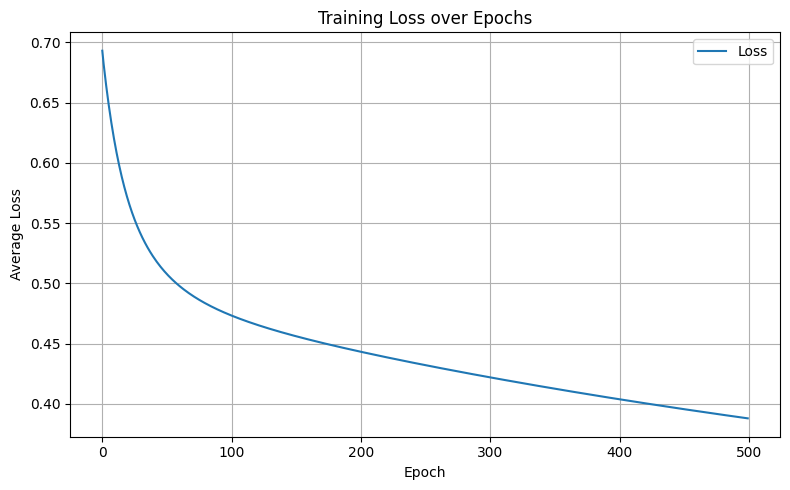

Final weights: w0 = -1.9963, w1 = 1.9224, w2 = 0.0097


In [62]:
plt.figure(figsize=(8, 5))
plt.plot(range(epochs), losses, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.title('Training Loss over Epochs')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

print(f"Final weights: w0 = {w0:.4f}, w1 = {w1:.4f}, w2 = {w2:.4f}")